In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Census.csv')
df = df.fillna(0)

In [2]:
 df = df.fillna(0)

In [3]:
df.drop(columns='Person ID', inplace=True)

In [4]:
# Define categorical columns
categorical_columns = ["Region", "Residence Type", "Family Composition", "Population Base","Economic Activity", "Occupation", "Industry", "Hours worked per week", "Approximated Social Grade"]

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply label encoding to each categorical column
df[categorical_columns] = df[categorical_columns].apply(lambda col: LE.fit_transform(col))

In [5]:
#standardise the data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05
mean,-8.700014e-17,1.835783e-16,1.903627e-16,7.083727e-18,8.460564e-17,1.301510e-16,-5.492383e-17,1.995416e-16,-1.077525e-16,-6.983956e-18,-7.383040e-17,7.881894e-17,-3.671566e-17,5.886478e-17,-1.149360e-16,-5.587165e-16,-5.395605e-16,-3.970878e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.793840e+00,-7.244075e+00,-1.827682e+00,-1.177643e-01,-1.015217e+00,-1.342053e+00,-7.610541e-01,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00
25%,-1.027515e+00,1.380438e-01,-2.450360e-01,-1.177643e-01,-1.015217e+00,-8.914996e-01,-7.610541e-01,5.343274e-01,-1.408145e-02,-4.428388e-01,-1.374042e-01,-5.693336e-01,-5.925055e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-6.989253e-01
50%,1.219718e-01,1.380438e-01,-2.450360e-01,-1.177643e-01,9.850107e-01,9.607496e-03,1.278190e-01,5.343274e-01,-1.408145e-02,2.298382e-01,-1.374042e-01,-1.682205e-01,-5.925055e-01,-1.957604e-01,-2.062965e-01,-8.724132e-01,-8.321093e-01,3.838595e-03
75%,8.882965e-01,1.380438e-01,5.462871e-01,-1.177643e-01,9.850107e-01,9.107146e-01,1.278190e-01,5.343274e-01,-1.408145e-02,2.298382e-01,-1.374042e-01,-1.682205e-01,1.025713e+00,7.666311e-01,7.889920e-01,1.158720e+00,9.792127e-01,7.066024e-01
max,1.654621e+00,1.380438e-01,2.920257e+00,1.245627e+01,9.850107e-01,1.811822e+00,2.794438e+00,5.343274e-01,8.531507e-01,2.247869e+00,2.736456e+00,2.639571e+00,2.643931e+00,1.729023e+00,1.784281e+00,1.835764e+00,2.186761e+00,1.409366e+00


In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_df)

/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [7]:
kmeans.cluster_centers_

array([[-5.19310716e-05,  4.29720489e-02, -8.33912165e-02,
        -1.03735293e-01,  1.67320415e-02,  4.04280371e-01,
         2.50955429e-01,  4.69692061e-01,  1.16568602e-01,
         1.95745609e-01,  4.97134184e-02,  4.00110640e-02,
         1.77852286e-01,  3.44507936e-01,  3.71634748e-01,
         2.84289625e-01,  2.73139713e-01,  3.85427454e-01],
       [ 1.56120406e-04, -1.29186892e-01,  2.50699056e-01,
         3.11859463e-01, -5.03015448e-02, -1.21538828e+00,
        -7.54447430e-01, -1.41203548e+00, -3.50440245e-01,
        -5.88470122e-01, -1.49453474e-01, -1.20285282e-01,
        -5.34677415e-01, -1.03569438e+00, -1.11724573e+00,
        -8.54660041e-01, -8.21140056e-01, -1.15871075e+00]])

In [8]:
 # Compute the silhouette score 
kmeans_silhouette = silhouette_score(scaled_features_df, kmeans.labels_).round(2)
kmeans_silhouette

0.28

In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

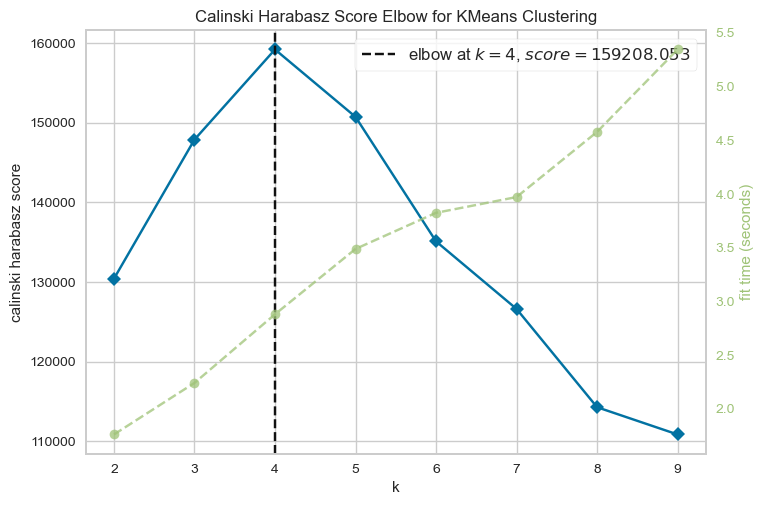

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_df)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


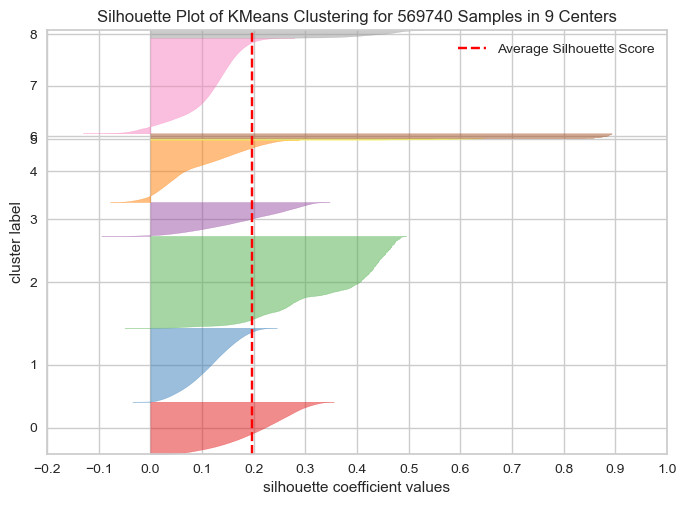

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569740 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_df)

/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [15]:
scaled_features_df.shape

(569740, 18)

In [16]:
scaled_features_df.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,-1.79384,0.138044,-0.245036,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,1.025713,1.408225,-0.703941,-0.872413,-0.832109,1.409366
1,-1.79384,0.138044,0.546287,-0.117764,0.985011,-1.342053,-0.761054,0.534327,-0.014081,0.229838,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689
2,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,1.361268,0.127819,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,1.025713,1.408225,-0.703941,-0.872413,-0.832109,0.003839
3,-1.79384,0.138044,-1.036359,-0.117764,0.985011,0.910715,1.905565,0.534327,-0.014081,0.902515,-0.137404,-0.168221,1.025713,1.729023,0.042526,-0.872413,-0.832109,1.409366
4,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689


In [17]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
#append dataframe with cluster number
scaled_features_df['cluster'] = kmeans.labels_

In [19]:
kmeans.labels_ == 0

array([ True, False,  True, ...,  True,  True,  True])

In [20]:
#view proterties of each cluster
cluster1=scaled_features_df.query("cluster == 0")
cluster2=scaled_features_df.query("cluster == 1")

In [21]:
cluster1.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
0,-1.79384,0.138044,-0.245036,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,1.025713,1.408225,-0.703941,-0.872413,-0.832109,1.409366,0
2,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,1.361268,0.127819,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,1.025713,1.408225,-0.703941,-0.872413,-0.832109,0.003839,0
3,-1.79384,0.138044,-1.036359,-0.117764,0.985011,0.910715,1.905565,0.534327,-0.014081,0.902515,-0.137404,-0.168221,1.025713,1.729023,0.042526,-0.872413,-0.832109,1.409366,0
9,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,1.361268,0.127819,0.534327,-0.014081,0.902515,-0.137404,-0.168221,1.025713,1.729023,-0.703941,-0.872413,-0.832109,1.409366,0
10,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,1.811822,0.127819,0.534327,-0.014081,0.902515,-0.137404,-0.168221,1.025713,0.445834,-0.703941,-0.872413,-0.832109,0.706602,0


In [22]:
cluster1.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
count,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.000000,427620.0
mean,-0.000078,0.042906,-0.083370,-0.103709,0.016709,0.404037,0.250744,0.469267,0.116589,0.195652,0.049732,0.040011,0.178073,0.344639,0.371557,0.284070,0.272917,0.385340,0.0
std,1.003473,0.832628,0.911602,0.420162,0.999609,0.811153,1.037948,0.390247,0.310238,0.641268,0.553232,0.848630,0.959076,0.879412,0.858907,1.001839,1.015272,0.798550,0.0
min,-1.793840,-7.244075,-1.827682,-0.117764,-1.015217,-0.891500,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.592505,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,0.0
25%,-1.027515,0.138044,-0.245036,-0.117764,-1.015217,-0.440946,-0.761054,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,-0.592505,-0.516558,-0.206296,-0.872413,-0.832109,0.003839,0.0
50%,0.121972,0.138044,-0.245036,-0.117764,0.985011,0.460161,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,-0.592505,0.125037,0.291348,0.481675,0.325124,0.003839,0.0
75%,0.888297,0.138044,-0.245036,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,1.025713,1.087428,1.286636,1.158720,1.180471,1.409366,0.0
max,1.654621,0.138044,2.920257,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,2.643931,1.729023,1.784281,1.835764,2.186761,1.409366,0.0


In [23]:
cluster2.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
1,-1.79384,0.138044,0.546287,-0.117764,0.985011,-1.342053,-0.761054,0.534327,-0.014081,0.229838,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1
4,-1.79384,0.138044,-0.245036,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1
5,-1.79384,0.138044,-1.036359,-0.117764,0.985011,-0.891500,-0.761054,-1.871512,-0.014081,0.229838,-0.137404,-0.569334,0.621158,-1.158152,-1.201585,-0.872413,-0.832109,0.003839,1
6,-1.79384,0.138044,-1.036359,-0.117764,0.985011,-0.891500,-0.761054,-1.871512,-0.014081,0.229838,-0.137404,-0.569334,0.621158,1.087428,0.291348,-0.872413,-0.832109,0.003839,1
7,-1.79384,0.138044,0.546287,-0.117764,-1.015217,-0.891500,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,1.430267,-1.158152,-1.201585,-0.872413,-0.832109,0.003839,1


In [24]:
cluster2.shape

(142120, 19)

In [25]:
cluster2.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
count,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.0
mean,0.000234,-0.129098,0.250849,0.312046,-0.050275,-1.215694,-0.754456,-1.411961,-0.350802,-0.588691,-0.149638,-0.120387,-0.535799,-1.036973,-1.117964,-0.854730,-0.821171,-1.159435,1.0
std,0.989483,1.378667,1.193575,1.829749,0.999499,0.245018,0.094524,0.945740,1.885559,1.519813,1.748756,1.350063,0.926687,0.499229,0.352046,0.124750,0.094699,0.546905,0.0
min,-1.793840,-7.244075,-1.827682,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-8.686402,-7.169608,-7.322055,-4.580464,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.0
25%,-1.027515,0.138044,-0.245036,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.0
50%,0.121972,0.138044,-0.245036,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.0
75%,0.888297,0.138044,0.546287,-0.117764,0.985011,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.0
max,1.654621,0.138044,2.920257,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,2.643931,1.729023,1.784281,1.835764,2.136446,1.409366,1.0


In [26]:
kmeans.cluster_centers_

array([[-5.19310716e-05,  4.29720489e-02, -8.33912165e-02,
        -1.03735293e-01,  1.67320415e-02,  4.04280371e-01,
         2.50955429e-01,  4.69692061e-01,  1.16568602e-01,
         1.95745609e-01,  4.97134184e-02,  4.00110640e-02,
         1.77852286e-01,  3.44507936e-01,  3.71634748e-01,
         2.84289625e-01,  2.73139713e-01,  3.85427454e-01],
       [ 1.56120406e-04, -1.29186892e-01,  2.50699056e-01,
         3.11859463e-01, -5.03015448e-02, -1.21538828e+00,
        -7.54447430e-01, -1.41203548e+00, -3.50440245e-01,
        -5.88470122e-01, -1.49453474e-01, -1.20285282e-01,
        -5.34677415e-01, -1.03569438e+00, -1.11724573e+00,
        -8.54660041e-01, -8.21140056e-01, -1.15871075e+00]])

In [27]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [28]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade', 'cluster'],
      dtype='object')

In [29]:
len(cluster1.keys())

19

In [30]:
cluster1_mean

array([-5.19310716e-05,  4.29720489e-02, -8.33912165e-02, -1.03735293e-01,
        1.67320415e-02,  4.04280371e-01,  2.50955429e-01,  4.69692061e-01,
        1.16568602e-01,  1.95745609e-01,  4.97134184e-02,  4.00110640e-02,
        1.77852286e-01,  3.44507936e-01,  3.71634748e-01,  2.84289625e-01,
        2.73139713e-01,  3.85427454e-01])

In [31]:
cluster2_mean

array([ 1.56120406e-04, -1.29186892e-01,  2.50699056e-01,  3.11859463e-01,
       -5.03015448e-02, -1.21538828e+00, -7.54447430e-01, -1.41203548e+00,
       -3.50440245e-01, -5.88470122e-01, -1.49453474e-01, -1.20285282e-01,
       -5.34677415e-01, -1.03569438e+00, -1.11724573e+00, -8.54660041e-01,
       -8.21140056e-01, -1.15871075e+00])

In [32]:
cluster1_mean_p1 = cluster1_mean[:8]

In [33]:
cluster1_mean_p1

array([-5.19310716e-05,  4.29720489e-02, -8.33912165e-02, -1.03735293e-01,
        1.67320415e-02,  4.04280371e-01,  2.50955429e-01,  4.69692061e-01])

In [34]:
cluster2_mean_p1 = cluster2_mean[:8]

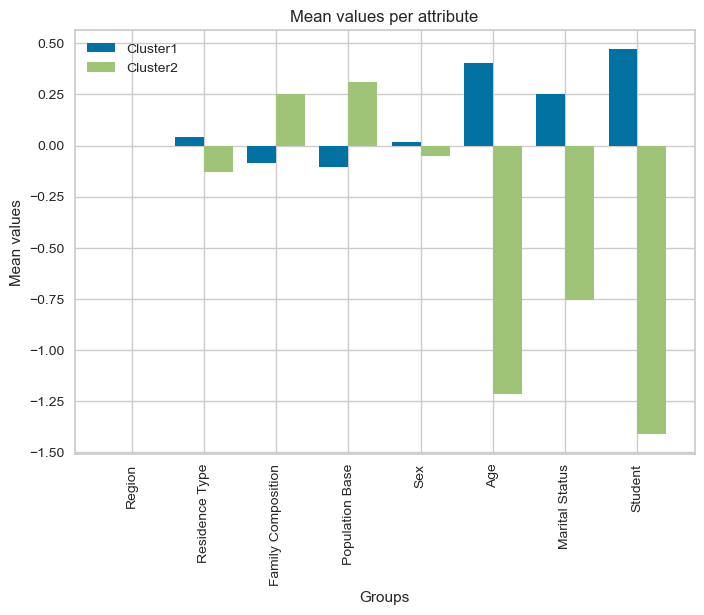

In [35]:
X = cluster1.keys()[:8]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [36]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

In [37]:
cluster1_mean_p2

array([0.1165686 , 0.19574561, 0.04971342, 0.04001106, 0.17785229,
       0.34450794, 0.37163475, 0.28428962, 0.27313971, 0.38542745])

In [38]:
cluster1.keys()[8:-1]

Index(['Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

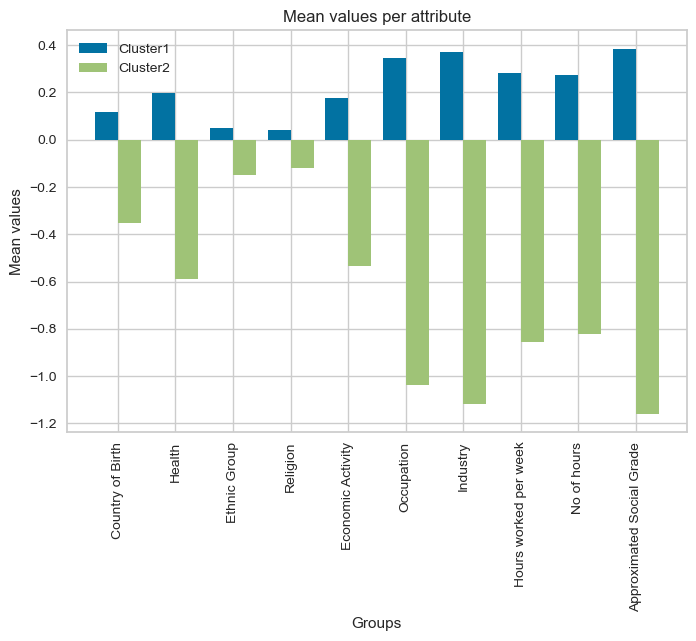

In [39]:
X = cluster1.keys()[8:-1]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [41]:

###             Hierarchical Clustering            ###


from sklearn.cluster import AgglomerativeClustering

X = scaled_features_df.sample(frac=0.01, replace=False, random_state=1)

# setting distance_threshold=0 ensures we compute the full tree.
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#change the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [42]:
cluster.labels_

array([ 9917, 10831, 11261, ...,     2,     1,     0])

In [43]:
#change the parameters
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
#append dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [45]:
X.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000
mean,-0.001938,0.011068,0.009757,-0.011280,-0.023441,0.006286,-0.004166,0.012411,0.011186,0.010178,0.006982,0.002187,0.001918,-0.000495,0.003592,0.001001,0.003571,0.003777,0.245459,0.261781
std,1.002642,0.959850,0.995372,0.956505,1.000123,1.001574,0.990164,0.991633,0.940913,0.961398,0.955770,0.981375,0.999310,0.996222,0.998820,1.001845,1.003639,0.998188,0.430378,0.462771
min,-1.793840,-7.244075,-1.827682,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-8.686402,-7.169608,-7.322055,-4.580464,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,0.000000,0.000000
25%,-1.027515,0.138044,-0.245036,-0.117764,-1.015217,-0.891500,-0.761054,0.534327,-0.014081,-0.442839,-0.137404,-0.569334,-0.592505,-1.158152,-1.201585,-0.872413,-0.832109,-0.698925,0.000000,0.000000
50%,0.121972,0.138044,-0.245036,-0.117764,-1.015217,0.009607,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,-0.592505,-0.195760,-0.206296,-0.872413,-0.832109,0.003839,0.000000,0.000000
75%,0.888297,0.138044,0.546287,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,1.025713,0.766631,0.788992,1.158720,0.979213,0.706602,0.000000,1.000000
max,1.654621,0.138044,2.920257,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,2.643931,1.729023,1.784281,1.835764,2.186761,1.409366,1.000000,2.000000


In [46]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")
cluster3=X.query("cluster_no == 2")

In [47]:
cluster1.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000,8531.0
mean,-0.001587,-0.028965,-0.086697,-0.063229,-0.004435,0.410622,0.245349,0.503024,0.114514,0.194986,0.050065,0.031795,0.177528,0.304670,0.344986,0.268031,0.262017,0.369595,0.018169,0.0
std,1.004336,1.097782,0.933379,0.826337,1.000116,0.813774,1.027984,0.272653,0.308215,0.641395,0.555169,0.841704,0.968097,0.882889,0.872035,1.009943,1.023280,0.826324,0.133570,0.0
min,-1.793840,-7.244075,-1.827682,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,0.000000,0.0
25%,-1.027515,0.138044,-0.245036,-0.117764,-1.015217,-0.440946,-0.761054,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,-0.592505,-0.516558,-0.455119,-0.872413,-0.832109,0.003839,0.000000,0.0
50%,0.121972,0.138044,-0.245036,-0.117764,0.985011,0.460161,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,-0.592505,0.125037,0.291348,0.481675,0.325124,0.003839,0.000000,0.0
75%,0.888297,0.138044,-0.245036,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,1.025713,1.087428,1.286636,1.158720,1.180471,1.409366,0.000000,0.0
max,1.654621,0.138044,2.920257,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,2.643931,1.729023,1.784281,1.835764,2.186761,1.409366,1.000000,0.0


In [48]:
cluster2.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,2745.000000,2.745000e+03,2745.000000,2.745000e+03,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.0
mean,-0.006866,1.380438e-01,0.389176,-1.177643e-01,-0.085421,-1.210252,-0.747454,-1.430660,0.067113,-0.252921,0.190813,0.108832,-0.500541,-0.898709,-1.005156,-0.791020,-0.763410,-1.072197,0.919126,1.0
std,0.997435,3.608882e-16,1.042321,1.401912e-15,0.997821,0.280309,0.121604,0.930905,0.252676,0.384857,0.682635,0.933762,0.917318,0.736990,0.579082,0.338603,0.318061,0.595697,0.272692,0.0
min,-1.793840,1.380438e-01,-1.036359,-1.177643e-01,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,0.000000,1.0
25%,-1.027515,1.380438e-01,-0.245036,-1.177643e-01,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.000000,1.0
50%,0.121972,1.380438e-01,-0.245036,-1.177643e-01,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.000000,1.0
75%,0.888297,1.380438e-01,1.337610,-1.177643e-01,0.985011,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-0.997060,-1.158152,-1.201585,-0.872413,-0.832109,-1.401689,1.000000,1.0
max,1.654621,1.380438e-01,2.920257,-1.177643e-01,0.985011,1.811822,1.905565,0.534327,0.853151,2.247869,2.736456,2.639571,1.430267,1.729023,1.784281,1.835764,2.086132,0.706602,1.000000,1.0


In [49]:
cluster3.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,119.000000,119.000000,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.0,119.0
mean,0.086553,-0.048060,-1.827682e+00,6.169252e+00,0.043727,-0.918003,-0.746115,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0
std,1.005114,1.162134,1.560884e-15,1.337901e-14,1.002604,0.236775,0.162966,3.790719e-15,1.070321e-14,1.427094e-14,1.427094e-14,8.919339e-16,2.564310e-15,6.689505e-16,1.337901e-15,8.919339e-16,1.449393e-15,2.898785e-15,0.0,0.0
min,-1.793840,-7.244075,-1.827682e+00,6.169252e+00,-1.015217,-1.342053,-0.761054,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0
25%,-0.644353,0.138044,-1.827682e+00,6.169252e+00,-1.015217,-0.891500,-0.761054,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0
50%,0.121972,0.138044,-1.827682e+00,6.169252e+00,0.985011,-0.891500,-0.761054,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0
75%,0.888297,0.138044,-1.827682e+00,6.169252e+00,0.985011,-0.891500,-0.761054,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0
max,1.654621,0.138044,-1.827682e+00,6.169252e+00,0.985011,0.910715,1.016692,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00,1.0,2.0


In [50]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())
cluster3_mean = np.array(cluster3.mean())

In [51]:
cluster1_mean

array([-0.0015869 , -0.0289646 , -0.08669716, -0.06322918, -0.00443515,
        0.41062179,  0.24534904,  0.50302411,  0.1145141 ,  0.19498609,
        0.0500654 ,  0.03179531,  0.17752813,  0.30466966,  0.34498555,
        0.26803069,  0.26201727,  0.36959542,  0.01816903,  0.        ])

In [52]:
cluster1_mean_p1 = cluster1_mean[:8]
cluster2_mean_p1 = cluster2_mean[:8]
cluster3_mean_p1 = cluster3_mean[:8]

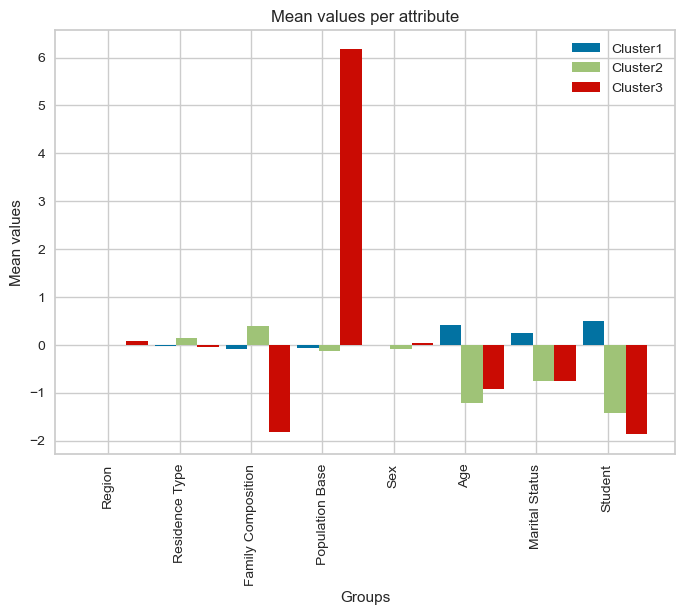

In [56]:
X = cluster1.keys()[:8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.4, cluster3_mean_p1, 0.3, label = 'Cluster3')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()


In [54]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade', 'cluster', 'cluster_no'],
      dtype='object')

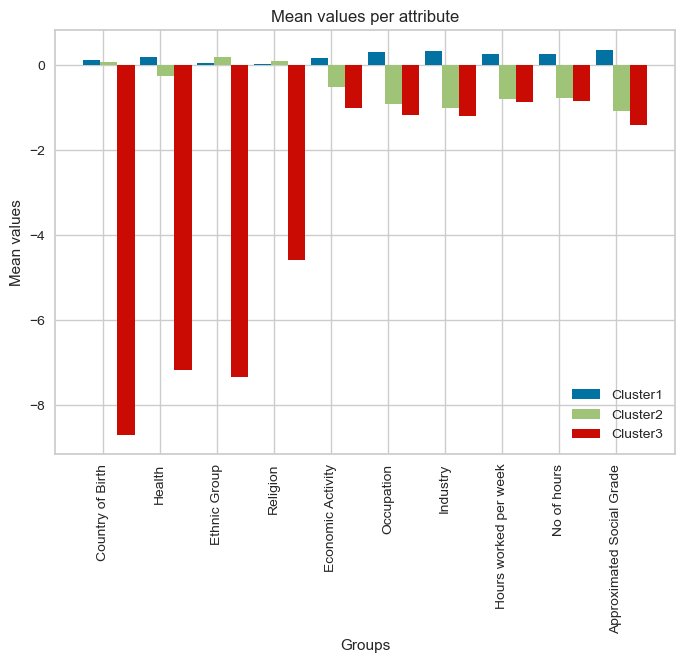

In [57]:
cluster1_mean_p2 = cluster1_mean[8:-2]
cluster2_mean_p2 = cluster2_mean[8:-2]
cluster3_mean_p2 = cluster3_mean[8:-2]

X = cluster1.keys()[8:-2]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')
plt.bar(X_axis + 0.4, cluster3_mean_p2, 0.3, label = 'Cluster3')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()